In [1]:
import pickle
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data
import datetime
import csv

##### for the notebook only (not for JupyterLab) run this command once per session

In [2]:
alt.renderers.enable('notebook')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## "Scaffolding" for case studies

In [3]:
domain_name = 'markets-unlimited'

In [6]:
with open('data/dnslog.pickle', mode="rb") as f:
    dnslog = pickle.load(f)

### Timeline for traffic


In [4]:
# Load the timeline of the total traffic on the site.
def load_single_timeline_traffic(day, domain):
    site_timelines = dict()
    with open("data/weeks/remote_userlogs/remote_userlog-%s.pickle" % day, mode="rb") as h:
        remote_userlog = pickle.load(h)
    for entry in remote_userlog:
        if 'public_addr' in entry:
            if entry['public_addr'] in dnslog:
                site = dnslog[entry['public_addr']]
                periods = 0
                for i in range(len(site)):
                    if site[i] == '.':
                        periods += 1
                if periods >= 2:
                    period_count = 0
                    site_ending = ''
                    if '.co.' in site or '.com.' in site:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 3 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                    else:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 2 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                elif periods == 1:
                    site_ending = site[:site.index('.')]
                else:
                    site_ending = site
                if site_ending == domain:
                    if site_ending not in site_timelines:
                        site_timelines[site_ending] = list()
                    site_timelines[site_ending].append((entry['start_time'], entry['bytes_a_to_b'] + entry['bytes_b_to_a']))
    return site_timelines

In [7]:
single_domain_traffic_data = list()
date = datetime.date(2019, 3, 4)
while (date < datetime.date(2019, 5, 17)):
    print(date)
    single_domain_traffic_data.append(load_single_timeline_traffic(str(date), domain_name))
    date += datetime.timedelta(days=7)

2019-03-04
2019-03-11
2019-03-18
2019-03-25
2019-04-01
2019-04-08
2019-04-15
2019-04-22
2019-04-29
2019-05-06
2019-05-13


In [8]:
time_tracker_traffic = dict()
traffic_site = list()
for entry in single_domain_traffic_data:
    for site in entry:
        for index in entry[site]:
            if datetime.datetime.combine(index[0].date(), datetime.time(hour=index[0].hour)) not in time_tracker_traffic:
                time_tracker_traffic[datetime.datetime.combine(index[0].date(), datetime.time(hour=index[0].hour))] = index[1]
            else:
                time_tracker_traffic[datetime.datetime.combine(index[0].date(), datetime.time(hour=index[0].hour))] += index[1]
for entry in time_tracker_traffic:
    traffic_site.append([domain_name, entry, time_tracker_traffic[entry]])

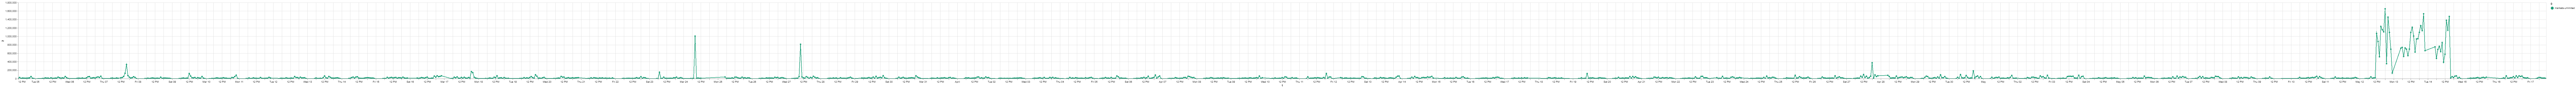

In [9]:
domain_traffic_timeline_df = pd.DataFrame(traffic_site)

alt.Chart(domain_traffic_timeline_df).mark_line(point=True).encode(
    x='1:T',
    y=alt.Y('2:Q', stack=None),
    color=alt.Color('0:O', scale=alt.Scale(scheme='dark2')),
    tooltip=['0:O', '1:T', '2:Q']
).properties(width=10000).interactive()

### Timeline for accesses

In [10]:
# Load the timeline of the total amount of accesses to the site.
def load_single_timeline_accesses(day, domain):
    site_timelines = dict()
    with open("data/weeks/remote_userlogs/remote_userlog-%s.pickle" % day, mode="rb") as h:
        remote_userlog = pickle.load(h)
    for entry in remote_userlog:
        if 'public_addr' in entry:
            if entry['public_addr'] in dnslog:
                site = dnslog[entry['public_addr']]
                periods = 0
                for i in range(len(site)):
                    if site[i] == '.':
                        periods += 1
                if periods >= 2:
                    period_count = 0
                    site_ending = ''
                    if '.co.' in site or '.com.' in site:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 3 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                    else:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 2 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                elif periods == 1:
                    site_ending = site[:site.index('.')]
                else:
                    site_ending = site
                if site_ending == domain:
                    if site_ending not in site_timelines:
                        site_timelines[site_ending] = list()
                    site_timelines[site_ending].append((entry['start_time'], 1))
    return site_timelines

In [11]:
single_domain_accesses_data = list()
dates = list()
date = datetime.date(2019, 3, 4)
while (date < datetime.date(2019, 5, 17)):
    print(date)
    single_domain_accesses_data.append(load_single_timeline_accesses(str(date), 'markets-unlimited'))
    date += datetime.timedelta(days=7)

2019-03-04
2019-03-11
2019-03-18
2019-03-25
2019-04-01
2019-04-08
2019-04-15
2019-04-22
2019-04-29
2019-05-06
2019-05-13


In [12]:
time_tracker_accesses = dict()
accesses_site = list()
for entry in single_domain_accesses_data:
    for site in entry:
        for index in entry[site]:
            if datetime.datetime.combine(index[0].date(), datetime.time(hour=index[0].hour)) not in time_tracker_accesses:
                time_tracker_accesses[datetime.datetime.combine(index[0].date(), datetime.time(hour=index[0].hour))] = index[1]
            else:
                time_tracker_accesses[datetime.datetime.combine(index[0].date(), datetime.time(hour=index[0].hour))] += index[1]
for entry in time_tracker_accesses:
    accesses_site.append([domain_name, entry, time_tracker_accesses[entry]])

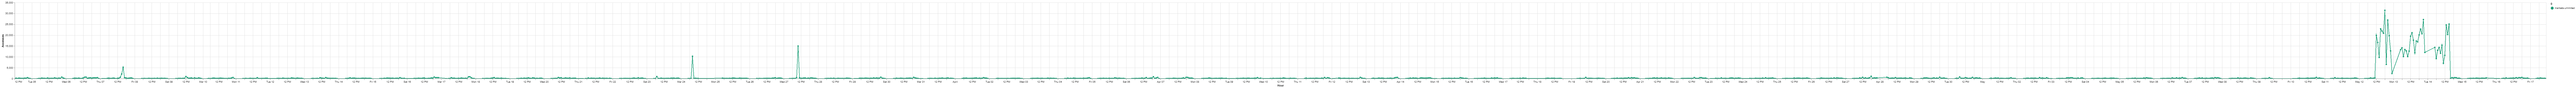

In [14]:
domain_accesses_timeline_df = pd.DataFrame(accesses_site)

alt.Chart(domain_accesses_timeline_df).mark_line(point=True).encode(
    x=alt.X('1:T', axis=alt.Axis(title='Hour')),
    y=alt.Y('2:Q', stack=None, axis=alt.Axis(title='Accesses')),
    color=alt.Color('0:O', scale=alt.Scale(scheme='dark2')),
    tooltip=['0:O', '1:T', '2:Q']
).properties(width=10000).interactive()

### Count of typical amount of traffic in one flow


In [15]:
# Load the timeline of the total traffic on the site.
def load_avg_traffic_per_flow(day, domain):
    site_timelines = dict()
    with open("data/weeks/remote_userlogs/remote_userlog-%s.pickle" % day, mode="rb") as h:
        remote_userlog = pickle.load(h)
    for entry in remote_userlog:
        if 'public_addr' in entry:
            if entry['public_addr'] in dnslog:
                site = dnslog[entry['public_addr']]
                periods = 0
                for i in range(len(site)):
                    if site[i] == '.':
                        periods += 1
                if periods >= 2:
                    period_count = 0
                    site_ending = ''
                    if '.co.' in site or '.com.' in site:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 3 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                    else:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 2 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                elif periods == 1:
                    site_ending = site[:site.index('.')]
                else:
                    site_ending = site
                if site_ending == domain:
                    if site_ending not in site_timelines:
                        site_timelines[site_ending] = list()
                    site_timelines[site_ending].append((entry['bytes_a_to_b'] + entry['bytes_b_to_a'], 1))
    return site_timelines

In [ ]:
single_count_traffic_flows = list()
date = datetime.date(2019, 3, 4)
while (date < datetime.date(2019, 5, 17)):
    print(date)
    single_count_traffic_flows.append(load_avg_traffic_per_flow(str(date), domain_name))
    date += datetime.timedelta(days=7)

In [ ]:
traffic_flows_combo = dict()
domain_traffic_flows = list()
for entry in single_count_traffic_flows:
    for site in entry:
        for index in entry[site]:
            if index[0] not in traffic_flows_combo:
                traffic_flows_combo[index[0]] = index[1]
            else:
                traffic_flows_combo[index[0]] += index[1]
for entry in traffic_flows_combo:
    domain_traffic_flows.append([domain_name, entry, traffic_flows_combo[entry]])

In [ ]:
domain_traffic_flows_df = pd.DataFrame(domain_traffic_flows)

alt.Chart(domain_traffic_flows_df).mark_bar().encode(
    x=alt.X('1:O', axis=alt.Axis(title='Traffic (bytes)')),
    y=alt.Y('2:Q', stack=None, axis=alt.Axis(title='Accesses')),
    color=alt.Color('0:O', scale=alt.Scale(scheme='dark2')),
    tooltip=['0:O', '1:O', '2:Q']
).properties(width=10000).interactive()

##### From this data, it looks like markets-unlimited is usually periodically accessing the user's phone, unless some special event occurs in which case more traffic will occur.

### Gantt Timeline for what times/for how long the site is accessed


In [ ]:
# Load the timeline of the total traffic on the site.
def load_gantt_timeline(day, domain):
    site_timelines = dict()
    with open("data/weeks/remote_userlogs/remote_userlog-%s.pickle" % day, mode="rb") as h:
        remote_userlog = pickle.load(h)
    for entry in remote_userlog:
        if 'public_addr' in entry:
            if entry['public_addr'] in dnslog:
                site = dnslog[entry['public_addr']]
                periods = 0
                for i in range(len(site)):
                    if site[i] == '.':
                        periods += 1
                if periods >= 2:
                    period_count = 0
                    site_ending = ''
                    if '.co.' in site or '.com.' in site:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 3 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                    else:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 2 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                elif periods == 1:
                    site_ending = site[:site.index('.')]
                else:
                    site_ending = site
                if site_ending == domain:
                    if site_ending not in site_timelines:
                        site_timelines[site_ending] = list()
                    site_timelines[site_ending].append((entry['start_time'], entry['end_time']))
    return site_timelines

In [ ]:
single_gantt = list()
date = datetime.date(2019, 3, 4)
while (date < datetime.date(2019, 5, 17)):
    print(date)
    single_gantt.append(load_gantt_timeline(str(date), domain_name))
    date += datetime.timedelta(days=7)

In [ ]:
gantt_combo = dict()
gantt_timeline = list()
for entry in single_gantt:
    for site in entry:
        for index in entry[site]:
            gantt_timeline.append([domain_name, index[0], index[1]])

In [ ]:
domain_gantt_timeline_df = pd.DataFrame(gantt_timeline)

alt.Chart(domain_gantt_timeline_df).mark_bar().encode(
    x=alt.X('1:T', axis=alt.Axis(title='Hour')),
    x2=alt.X2('2:T'),
    y=alt.Y('0:O', axis=alt.Axis(title='Site')),
    tooltip=['0:O', '1:T', '2:T']
).properties(width=10000).interactive()

### Ports accessed by the site and how much traffic went to each one

In [ ]:
# Load how much traffic is going to each port
def load_domain_ports(day, domain):
    site_timelines = dict()
    with open("data/weeks/remote_userlogs/remote_userlog-%s.pickle" % day, mode="rb") as h:
        remote_userlog = pickle.load(h)
    for entry in remote_userlog:
        if 'public_addr' in entry:
            if entry['public_addr'] in dnslog:
                site = dnslog[entry['public_addr']]
                periods = 0
                for i in range(len(site)):
                    if site[i] == '.':
                        periods += 1
                if periods >= 2:
                    period_count = 0
                    site_ending = ''
                    if '.co.' in site or '.com.' in site:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 3 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                    else:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 2 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                elif periods == 1:
                    site_ending = site[:site.index('.')]
                else:
                    site_ending = site
                if site_ending == domain:
                    if site_ending not in site_timelines:
                        site_timelines[site_ending] = list()
                    site_timelines[site_ending].append((entry['port_b'], entry['bytes_a_to_b'] + entry['bytes_b_to_a']))
    return site_timelines

In [ ]:
single_ports_traffic = list()
date = datetime.date(2019, 3, 4)
while (date < datetime.date(2019, 5, 17)):
    print(date)
    single_ports_traffic.append(load_domain_ports(str(date), domain_name))
    date += datetime.timedelta(days=7)

In [ ]:
ports_traffic_combo = dict()
for entry in single_ports_traffic:
    for week in entry.values():
        for couple in week:
            if couple[0] not in ports_traffic_combo:
                ports_traffic_combo[couple[0]] = couple[1]
            else:
                ports_traffic_combo[couple[0]] += couple[1]
        
ports_traffic = list()
for entry in ports_traffic_combo:
    ports_traffic.append([domain_name, entry, ports_traffic_combo[entry]])

In [ ]:
domain_ports_traffic_df = pd.DataFrame(ports_traffic)

alt.Chart(domain_ports_traffic_df).mark_bar().encode(
    x=alt.X('1:O', axis=alt.Axis(title='Port')),
    y=alt.Y('2:Q', axis=alt.Axis(title='Traffic')),
    tooltip=['0:O', '1:O', '2:Q']
).properties(width=100).interactive()

### Users that access this site/have traffic to and from this site

In [ ]:
# Load how much traffic is going to/from each user/address
def load_domain_users(day, domain):
    site_timelines = dict()
    with open("data/weeks/remote_userlogs/remote_userlog-%s.pickle" % day, mode="rb") as h:
        remote_userlog = pickle.load(h)
    for entry in remote_userlog:
        if 'public_addr' in entry:
            if entry['public_addr'] in dnslog:
                site = dnslog[entry['public_addr']]
                periods = 0
                for i in range(len(site)):
                    if site[i] == '.':
                        periods += 1
                if periods >= 2:
                    period_count = 0
                    site_ending = ''
                    if '.co.' in site or '.com.' in site:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 3 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                    else:
                        for i in range(len(site)):
                            if site[i] == '.':
                                period_count += 1
                            if period_count + 2 == periods:
                                site_ending = site[i + 2:]
                                site_ending = site_ending[:site_ending.index('.')]
                elif periods == 1:
                    site_ending = site[:site.index('.')]
                else:
                    site_ending = site
                if site_ending == domain:
                    if site_ending not in site_timelines:
                        site_timelines[site_ending] = list()
                    site_timelines[site_ending].append((entry['private_addr'], entry['bytes_a_to_b'] + entry['bytes_b_to_a']))
    return site_timelines

In [ ]:
single_users_traffic = list()
date = datetime.date(2019, 3, 4)
while (date < datetime.date(2019, 5, 17)):
    print(date)
    single_users_traffic.append(load_domain_users(str(date), domain_name))
    date += datetime.timedelta(days=7)

In [ ]:
users_traffic_combo = dict()
for entry in single_users_traffic:
    for week in entry.values():
        for couple in week:
            if couple[0] not in users_traffic_combo:
                users_traffic_combo[couple[0]] = couple[1]
            else:
                users_traffic_combo[couple[0]] += couple[1]
        
users_traffic = list()
for entry in users_traffic_combo:
    users_traffic.append([domain_name, entry, users_traffic_combo[entry]])

In [ ]:
domain_users_traffic_df = pd.DataFrame(users_traffic)

alt.Chart(domain_users_traffic_df).mark_bar().encode(
    x=alt.X('1:O', axis=alt.Axis(title='User')),
    y=alt.Y('2:Q', axis=alt.Axis(title='Traffic')),
    tooltip=['0:O', '1:O', '2:Q']
).properties(width=1000).interactive()